## Task-D: Collinear features and their effect on linear models

In [73]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [19]:
feature_data = data[["x","y","z","x*x","2*y","2*z+3*x*x","w"]].corr()

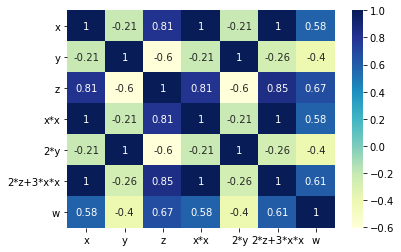

In [20]:
# plotting correlation heatmap
dataplot = sns.heatmap(feature_data, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [21]:
alpha_list = [0.0001, 0.001, 0.01, 0.1,1,10]
param_grid={'C':alpha_list}
clf = LogisticRegression()
logRegression = GridSearchCV(clf, param_grid, cv=5)
#clf.fit(X, Y)

In [22]:
logRegression.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [24]:
logRegression.best_score_

1.0

In [25]:
logRegression.best_params_

{'C': 0.0001}

In [27]:
best_model = LogisticRegression(C=0.0001)

In [28]:
best_model.fit(X,Y)

LogisticRegression(C=0.0001)

In [46]:
print("Best Model Weight is: "+str(best_model.coef_))
model_weight = best_model.coef_

Best Model Weight is: [[ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
   0.00316958]]


In [31]:
best_model_predictions  = best_model.predict(X)

In [34]:
best_model_accuracy = accuracy_score(best_model_predictions,Y)
print("Best Model Accuracy is : "+str(best_model_accuracy))

Best Model Accuracy is : 1.0


In [36]:
noise_X = X+0.01

In [37]:
alpha_list = [0.0001, 0.001, 0.01, 0.1,1,10]
param_grid={'C':alpha_list}
clf = LogisticRegression()
logRegression = GridSearchCV(clf, param_grid, cv=5)

In [38]:
logRegression.fit(noise_X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [39]:
logRegression.best_params_

{'C': 0.0001}

In [54]:
best_model_noise = LogisticRegression(C=0.0001)

In [55]:
best_model_noise.fit(noise_X,Y)

LogisticRegression(C=0.0001)

In [56]:
print("Best Model Weight for Noisy X is: "+str(best_model_noise.coef_))

noisy_model_weight = best_model_noise.coef_

Best Model Weight for Noisy X is: [[ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
   0.00316958]]


In [57]:
best_model_predictions_noisy  = best_model_noise.predict(X)

In [44]:
best_model_accuracy_noisy = accuracy_score(best_model_predictions_noisy,Y)
print("Best Model Accuracy for Noisy X is : "+str(best_model_accuracy_noisy))

Best Model Accuracy for Noisy X is : 1.0


In [47]:
#find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
best_model_accuracy-best_model_accuracy_noisy

0.0

In [50]:
print(type(noisy_model_weight))
type(model_weight)

<class 'numpy.ndarray'>


numpy.ndarray

In [58]:
np.set_printoptions(precision=8)
Asboslute_weight = np.absolute(model_weight - noisy_model_weight)
print("Absolute change" + str(Asboslute_weight))

Absolute change[[0. 0. 0. 0. 0. 0. 0.]]


In [66]:
percentage_change = []
for i in range(len(data.columns)-1):
    per = (Asboslute_weight[0][i]/model_weight[0][i])*100
    percentage_change.append(per)

In [67]:
print(percentage_change)

[0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0]


In [68]:
# As we can see top 4 feature are

In [71]:
print("Top 4 features are :" )
print('x','z','x*x' , '2*z+3*x*x')

Top 4 features are :
x z x*x 2*z+3*x*x


#  TASK - 2

In [74]:
alpha_list = [0.0001, 0.001, 0.01, 0.1,1,10]
param_grid={'C':alpha_list}
clf = SVC(kernel="linear")
SVM = GridSearchCV(clf, param_grid, cv=5)

In [75]:
SVM.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [83]:
print("Best Model Weight is: "+str(SVM.best_params_))

Best Model Weight is: {'C': 0.01}


In [84]:
best_model = SVC(kernel="linear",C=0.01)

In [86]:
best_model.fit(X,Y)

SVC(C=0.01, kernel='linear')

In [87]:
best_model_predictions  = best_model.predict(X)

In [88]:
print("Best Model Weight is: "+str(best_model.coef_))
model_weight = best_model.coef_

Best Model Weight is: [[ 0.16231443 -0.21809058  0.35982752  0.15193189 -0.21809058  0.18018286
   0.1470533 ]]


In [89]:
best_model_accuracy = accuracy_score(best_model_predictions,Y)
print("Best Model Accuracy is : "+str(best_model_accuracy))

Best Model Accuracy is : 1.0


In [90]:
alpha_list = [0.0001, 0.001, 0.01, 0.1,1,10]
param_grid={'C':alpha_list}
clf = SVC(kernel="linear")
SVM = GridSearchCV(clf, param_grid, cv=5)

In [91]:
SVM.fit(noise_X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [92]:
SVM.best_params_

{'C': 0.01}

In [93]:
best_model_noise = SVC(kernel="linear",C=0.01)

In [94]:
best_model_noise.fit(noise_X,Y)

SVC(C=0.01, kernel='linear')

In [95]:
print("Best Model Weight for Noisy X is: "+str(best_model_noise.coef_))
noisy_model_weight = best_model_noise.coef_

Best Model Weight for Noisy X is: [[ 0.16231442 -0.21809059  0.35982752  0.15193189 -0.21809059  0.18018286
   0.14705329]]


In [96]:
best_model_predictions_noisy  = best_model_noise.predict(X)

In [97]:
best_model_accuracy_noisy = accuracy_score(best_model_predictions_noisy,Y)
print("Best Model Accuracy for Noisy X is : "+str(best_model_accuracy_noisy))

Best Model Accuracy for Noisy X is : 1.0


In [98]:
#find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
best_model_accuracy-best_model_accuracy_noisy

0.0

In [106]:
Asboslute_weight = np.absolute(model_weight - noisy_model_weight)
print("Absolute change" + str(Asboslute_weight))

Absolute change[[1.48646120e-09 2.62874933e-09 1.31725925e-09 1.37899145e-09
  2.62874933e-09 1.40014039e-09 3.55973501e-09]]


In [100]:
percentage_change = []
for i in range(len(data.columns)-1):
    per = (Asboslute_weight[0][i]/model_weight[0][i])*100
    percentage_change.append(per)

In [101]:
print(percentage_change)

[9.157911817005411e-07, -1.2053474667178074e-06, 3.6608073846506665e-07, 9.07637938454952e-07, -1.2053474667178074e-06, 7.770663514742975e-07, 2.4207108009694052e-06]


In [105]:
print("Top 4 Features are: ")
print("x\n","z\n","x*x\n","2*z+3*x*x\n")

Top 4 Features are: 
x
 z
 x*x
 2*z+3*x*x



# Observations

### 1. From Correlation Matrix we can see that some of features are highly.
### 2. From Both SVM and Logistic Regression we can conclude that there is no collinearity between features.
### 3. On Both SVM and LR, weights have small change after adding Noise.